In [1]:
#veri analizi 7. derste corr işlendi ve güzel bir dersti tekrar çalış onu

# 10 Feature Engineering 

## 1 Outliers 

### 1) Outliers Özellik mühendisliği & veri önişleme

bu kısımda özllikle veri ön işleme ve özellik mühendisliği
kavramları ele alınmış olacak

 eğer verim kötüyse machine learnşng sonuçlrım kötü olacak.

bu bölümde : 
1) outlier değerlere bakacağım
2) misisng values(eksik değerler) 
3) encoding
4) feature scaling (özellik ölçeklendirme)
5) feature extraction(özellik çıkarımı)
6) özellik etkileşimleri
7) end to and application (uçtan uca bir uygulama yapılacak)

 #### değişken mühendisliği ile özellik mühendisliği arasında bir değerlendirme 

uygulamalı makine öğrenmesi temel olarak değişken mühendisliğidir.
(andrew ng bakmayı unutma)

değşiken mühendisliğinde veriden değşikenler üretmek ve değişkenler üzerinde çalışabilmek önemlidir. bunu iyi anlamak lazım 

#### özellik mühendisliği tanımı: özellikler üzerinde gerçekleştirilen çalışmalar (ham veriden değşiken üretmek.) 

#### veri ön işleme: çalışmalar öncesi verinin uygun hale getirilmesi sürecidir.

özellik mühendisliği veri ön işleme süreçlerinin alt başlıklarından birisidir. yani büyük şemsiye veri ön işleme veri hazırlama basamağıdır. bunun altında önişleme işlemleri, özellik mühendisliği-özellik çıkarımı, özellik ölçeklendirme işlemleri gibi işlmeler vardır.

#### eğer problemim makine öğrenmesi problemiyse bundan sonra makine öğrenmesi prosesleri başlayacak

- veri ön işleme kısmı anlandıktan sonra geri kalan kısımlarını daha rahat olarak çalışılacak



### 2) Outliers (aykırı değerler)

#### verideki genel eğilimin ıdşına çıkan değerlere aykırı değer denir. aykırı değer neye sebep olur? örn negatif bir ilişki var ise 3 tane pozitif bir outlier değer eklendiğinde sonucun pozitif ve daha şiddetli bir ilişki varmış gibi çıkmasına sebep olabilir (ekranda örn gösterdi).

özellikle doğrusal yöntemlerde aykırı değerlerin etkileri daha şiddetlidir. ağaç yöntemlerinde daha azdır.

(boxplot grafik kullanılacak)

1- aykırı değerler neye göre belirlenir?

* sektör bilgisi (bazı durumlarda sektörel bazlı bilgi ile de aykırı değer tahmini yapılabilir.)
* standart sapma yaklaşımı(değişkenin ortlaması alınıp standart sapması alınıp belirli aralıklar arasındaki değerlere aykırı değer muamelesi yapılabilir)
* z-skoru yaklaşımı(ilgili değişken standart normal dağılıma uyarlanır yani standartlaştırılır. böylece -3 +3 civarı değerlereden oluşur, z sokur neticesinde ortalama 0 olur böylece -2.5 ile +2.5 değereleri eşik değer olarak belirlenir. bunalrın altında ve üstünde kalan değerler aykırı değer olarak belirilenir.)
* boxplot( interquartile range - IQR) yöntemi (tek değişkenli olarak): çeyrekliklerden oluşmaktadır q1 ve eq3 değerleri aralığında kullanılır ve ortadaki çizgi mediandır. hesaplama yapılırken IQR hesaplaması yapılır aslında robast dağılım ölçsüdür yani dağılım en çok hangi aralığa dağıldığını gösterir. q1 ile q3 arasındaki değerler kabul edilebilir değereler aralığıdır.

çok değişkenli olarak LOF yöntemi kullanılacak.

not: aykırı değer yaklşımında önemli olan nokta eşik değer belirlemektir. benim için kabul edilebilir son nokta neresidir önemli olan budur.

### 3) Outliers değerleri yakalama

In [2]:
#kurulum işlemleri

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install missingno
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor #çok değişkenli ayıklama yöntemi bunkarı gptye sor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler #standartlaştırma ve dönüştürme fonksiyonları

Defaulting to user installation because normal site-packages is not writeable


In [3]:
#bazı görsellştirme ayarları, tüm sütunları göster 500e kadar gibi
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.float_format", lambda x:"%.3f" % x) 
pd.set_option("display.width", 500)

In [4]:
def load_application_train(): #büyük veriler için bu data set kullanıldı
    data = pd.read_csv("application_train.csv")
    return data
    
    
df = load_application_train()
df.head()
# 100den fazladeğişken bulunmakta

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.500,24700.500,351000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019,-9461,-637,-3648.000,-2120,NaN,1,1,0,1,1,0,Laborers,1.000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083,0.263,0.139,0.025,0.037,0.972,0.619,0.014,0.000,0.069,0.083,0.125,0.037,0.020,0.019,0.000,0.000,0.025,0.038,0.972,0.634,0.014,0.000,0.069,0.083,0.125,0.038,0.022,0.020,0.000,0.000,0.025,0.037,0.972,0.624,0.014,0.000,0.069,0.083,0.125,0.037,0.021,0.019,0.000,0.000,reg oper account,block of flats,0.015,"Stone, brick",No,2.000,2.000,2.000,2.000,-1134.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.500,35698.500,1129500.000,Family,State servant,Higher education,Married,House / apartment,0.004,-16765,-1188,-1186.000,-291,NaN,1,1,0,1,1,0,Core staff,2.000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311,0.622,NaN,0.096,0.053,0.985,0.796,0.060,0.080,0.035,0.292,0.333,0.013,0.077,0.055,0.004,0.010,0.092,0.054,0.985,0.804,0.050,0.081,0.035,0.292,0.333,0.013,0.079,0.055,0.000,0.000,0.097,0.053,0.985,0.799,0.061,0.080,0.035,0.292,0.333,0.013,0.079,0.056,0.004,0.010,reg oper account,block of flats,0.071,Block,No,1.000,0.000,1.000,0.000,-828.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.000,6750.000,135000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010,-19046,-225,-4260.000,-2531,26.000,1,1,1,1,1,0,Laborers,1.000,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.556,0.730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
def load(): # küçük veriler için bu dataset kullanıldı
    data = pd.read_csv("titanic.csv")
    return data
# küçük veriler de kullandığımız uygulamalar büyük verilerde işe yarıyor mu diye karşılaştıracağım.
df = load()
df.head()
# bunu yapmamın sebebi büyük verilerde ihtiyaç duyduğum fonksyionları elimle yazarak çözüm üretmektir.
# bi küçük veride bakacağım fonksiyonlarım nasıl ilerliyor bir de büyük veride bakacağım fonksiyonlarım nasıl ilerliyor


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [6]:
#1- aykırı değerleri yakalama (outliers)
# grafik teknik aykırı değer yaklaamk için boxplot grafik kullanılır

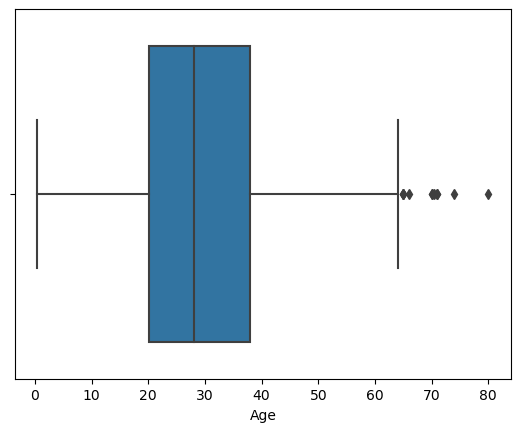

In [7]:
sns.boxplot(x = df["Age"]) #sayısal değişkenin dağılım bilgsini verir
plt.show()
#kutu grafikten sonra hangi teknik kullanılır?
# histogram grafik kullanılır

burada açıkan outlier değerlere nasıl uaşacağım problemim bulunmakta bunu nasıl yapacağım

In [8]:
# aykırı değerler nasıl yakalanır?
# öncelikle yapmam gereken şey eşik değerlere erişmek
# bir değişkenin çeyrek değerlerini hesplamam lazım ondan sonra 
#ıqr hesbı yapabilirim

In [9]:
q1 = df["Age"].quantile(0.25) # quantile metodu bana girdiğim parametrdeki kısmı gtirecek burada %25lik çeyreği getir dedim
q1

20.125

In [10]:
q3 = df["Age"].quantile(0.75) #q3 hesabı için de %75lik kısmını kullanıyorum
q3

38.0

In [11]:
# iqr hesabı q3 - q1 şeklinde yapılır

iqr = q3 - q1
iqr

17.875

In [12]:
# üst limiti bulmak için q3ü bir buçuk ile çarpmam lazım

up = q3 + 1.5 * iqr
up

64.8125

In [13]:
 #alt limit için a1den bir buçuk katını  çıkarmam gerek
    
low = q1 - 1.5 * iqr
low

-6.6875

bu sayede yaş değişkenim için alt ve üst sınırlarımı belirlemiş oldum. ancak yaş değerlerinde eksi değer olamaz. bu yüzden yapacağım işlemlerde bunu görmezden gelmem lazım.

In [14]:
df[(df["Age"] < low) | (df["Age"] > up)] #aykırı değerlerimin sonucu

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.000,0,0,C.A. 24579,10.500,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.000,0,1,113509,61.979,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.000,0,0,PC 17754,34.654,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.500,0,0,370369,7.750,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.000,0,0,336439,7.750,NaN,Q
456,457,0,1,"Millet, Mr. Francis Davis",male,65.000,0,0,13509,26.550,E38,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.000,0,0,PC 17609,49.504,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.000,0,0,27042,30.000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.000,0,0,C.A. 24580,10.500,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.000,1,1,WE/P 5735,71.000,B22,S


alt sınırım için sonuç döndürmedi çünkü eksili yaş olamayacağı için bunu görmezden geliyorum. bu yüzden biraz daha az değer çıktı.

In [15]:
df[(df["Age"] < low) | (df["Age"] > up)].index 
#bana gözlerimlerin indexleri lazım olduğu için .index diyerek index bilgilerini elde ediyorum

Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

#### hızlı bir şekilde aykırı değer var mı yok mu bunu sorgulamak stiyorum bunu nasıl gerçekleştririm?

In [16]:
df[(df["Age"] < low) | (df["Age"] > up)].any(axis = None) # yani burada herhangi biroutlier değer var mı diye sordum.
#  belirlediğim aralığa göre herhangi bir değer var mı diye sordu, satır ya da sütuna göre değil de hepsine bakmak istediğim için axisi none yaptım.

True

In [17]:
df[~((df["Age"] < low) | (df["Age"] > up))].any(axis = None) # bir de tersinden kontrol ederek aykırı olmayanları getir diyorum bunun için bir parantez içine daha alıp dışına tilda işareti koyuyorum.
#içinde aykırı olmayan gözlemler de olduğu iççin true döndü

True

In [18]:
# bir kez daha farklı şekild ekontrol ediyorum
df[(df["Age"] < low)].any(axis = None) #yani belirlediğim low değerin altında değer yok

False

#### elimde çok fazla değişken olduğunda teker teker elimle bu şekilde yazamayacağım için daha programatik şekilde yazmam gerekiyor bunları yani daha kapsayıcı ve otomatik şekilde bana getirecek şekilde

### 4) Outliers Fonksiyonlaştırma

daha önce yapmış olduğum işlemleri fonksiyonlaştırarak yapacağım.fazla olduğunda teker teker değişkenleri gezemem bunun için yaptığım şlemleri fonksiyonlaştırmam lazım. kritik nokta eşik değeri hesaplamaktan geçiyor. bunun iiçin öyle bir fnksiyon yazmam lazım ki kendisine girilen değişkenlerin eşik değerlerni hesaplaması lazım(outlier thresholds fonksiyonu). daha sonra değişkende aykırı değer var mı yok mu şeklinde hızlıca soracağım bir fonkiyon yazacağım bunu adına da check_outlier fonksiyonu diyeceğim. (bu kısma iyi odaklanmam lazım)

In [19]:
def outlier_thresholds(dataframe, col_name, q1 = 0.25, q3 = 0.75): #q1, q3 değerleri ön tanıml ıdeğerler verilmişş ve data verilmiş
    quartile1  =dataframe[col_name].quantile(q1) #quantillardan öntanımlı değerlere göre seçim yap denmiş
    quartile3  =dataframe[col_name].quantile(q3) #yukarıdaki işlmelerin aynısı aslında sadece değişkenleri yazmadım quantile koduna gidip bakabiilrsin
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit #saklamak istediğim için return ediyorum

In [20]:
outlier_thresholds(df, "Age") #q1 ve q3 değişkenlerim ön tanımlı olduğu için yazmam gerekmedi
#yaş değişşkeni için alt e üst limitleri belirledi. artık he rseferinde uzun uzun q1 hesapla q3 hesapla,
#iqr değeri hesapla ile uğraşmayacağım. girdiğimde hepsini hesaplayacak. girdiğimde eşik değerlerini verecek.

(-6.6875, 64.8125)

In [21]:
outlier_thresholds(df, "Fare") # alt ve üst limit, bu aralıklara göre değişkenin aykırı değerleirne eriş işleminde sıra

(-26.724, 65.6344)

In [22]:
low, up = outlier_thresholds(df, "Age")
#Age değişkeni için aykırı değerler
df[(df["Age"] < low) | (df["Age"] > up)].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.000,0,0,C.A. 24579,10.500,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.000,0,1,113509,61.979,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.000,0,0,PC 17754,34.654,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.500,0,0,370369,7.750,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.000,0,0,336439,7.750,NaN,Q


In [23]:
low, up = outlier_thresholds(df, "Fare")
#Fare değişkeni için aykırı değerler
df[(df["Fare"] < low) | (df["Fare"] > up)].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000,3,2,19950,263.000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.521,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.000,1,0,PC 17604,82.171,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000,1,0,PC 17572,76.729,D33,C


In [24]:
#bir de indexlerini merak edersem sadece problemleri değerlerin indksine ulaşabilirim
df[(df["Fare"] < low) | (df["Fare"] > up)].index

Index([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102,
       ...
       792, 802, 820, 829, 835, 846, 849, 856, 863, 879], dtype='int64', length=116)

#### şimdi de checkaoutlier fonksiyonunu yazacağım, bunun görevi de aykırı değer var mı yok mu hızlıca öğrenmek istiyordum bunun için kullanacağım. her seferind eelimle değişkeni değiştirmek yerine bunu da fonksiyon şeklinde yazmam gerekiyor. bunu da genellemeye ihtiyacım var.

In [25]:
#dip not: eğer outlier_thresholds fonksiyonundaki ön tanımlı q1 q3 değerlerini değiştirmek istiyorsam ekstreadan parametre olarak vermem lazım. 
#kullanmak zorunda olduğum parametrelerimi verdim. diğerleri isterse seçilebilir.
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis = None): #yukarıda yaptığım işlemin aynısı
        return True #eğer yukarıda kontrol ettiği fonksiyonda outlier değer bulunursa returnü true olacak
    else:
        return False #eğer yoks false olacak

In [26]:
check_outlier(df, "Age") #aykırı değer var ve artık işlemlerimi buna göre yönlendirebilirim.

True

In [27]:
check_outlier(df, "Fare") #aykırı değerlere ulaşıldı
#eğer 100 küsür eğişken olursa elimle böyle teker teker yazmayacağım.
# bunun için de bir fonksiyon yazacağım

True

### 5) Outliers Fonksiyonlaştırma 2


#### grab_col_name fonksiyonunu yazacağım burada problem fonksiyonel script seviyesinde gitmek istediğim için elimle teker teker check etmek için değişkenleri giremem bu yüzden bunu fonksiyonlarştırmam lazım ve otomatik hale getirmem lazım.

In [28]:
dff = load_application_train()
dff.head()
#bu ver isetinde 122 değşken bulunmakta

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.500,24700.500,351000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019,-9461,-637,-3648.000,-2120,NaN,1,1,0,1,1,0,Laborers,1.000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083,0.263,0.139,0.025,0.037,0.972,0.619,0.014,0.000,0.069,0.083,0.125,0.037,0.020,0.019,0.000,0.000,0.025,0.038,0.972,0.634,0.014,0.000,0.069,0.083,0.125,0.038,0.022,0.020,0.000,0.000,0.025,0.037,0.972,0.624,0.014,0.000,0.069,0.083,0.125,0.037,0.021,0.019,0.000,0.000,reg oper account,block of flats,0.015,"Stone, brick",No,2.000,2.000,2.000,2.000,-1134.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.500,35698.500,1129500.000,Family,State servant,Higher education,Married,House / apartment,0.004,-16765,-1188,-1186.000,-291,NaN,1,1,0,1,1,0,Core staff,2.000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311,0.622,NaN,0.096,0.053,0.985,0.796,0.060,0.080,0.035,0.292,0.333,0.013,0.077,0.055,0.004,0.010,0.092,0.054,0.985,0.804,0.050,0.081,0.035,0.292,0.333,0.013,0.079,0.055,0.000,0.000,0.097,0.053,0.985,0.799,0.061,0.080,0.035,0.292,0.333,0.013,0.079,0.056,0.004,0.010,reg oper account,block of flats,0.071,Block,No,1.000,0.000,1.000,0.000,-828.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.000,6750.000,135000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010,-19046,-225,-4260.000,-2531,26.000,1,1,1,1,1,0,Laborers,1.000,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.556,0.730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [29]:
def grap_col_names(dataframe, cat_th = 10, car_th = 20):
    
    """
    veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: kategorik değişkenlerin içerisine nunmerik görünümlü faka tkategork değişşkenler de dahildir.
    bunu daha önce yazmştım bak.
     iş hayatın boyunca baya işine yarar.
    """
    # cat_cols , cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == 0] #burada önce kategorik değişkenleri seçtim
    
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and #daha sonra numeric ama kategorik olanlar seçilmiş. nasıl çalışıyor peki? fonksiyonun başında parametre olarak cat_th belirlenmiş eğer bir değişken 10dan az sınıfa sahipse sayısal olsa dahi bu kategorik değişkendir.
                  dataframe[col].dtypes != "0"] # cat_th parametresi bir yorumdur. 10 olmak zorunda değildir. 
    
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and # eğer bir categorik bir değişkenin  uniq sınıf sayısı 20 den büyükse bu onun artık kardinal bir değişkne olduğuna işaret eder diyorum
                  dataframe[col].dtypes == "0"] #yani artık ölçülemezdir  
    
    cat_cols = cat_cols + num_but_cat #daha sonra cat_cols listemi baştan oluşturuyorum. cat_cols ile num_but_cat listemi topluyorum
    
    cat_cols = [ col for col in cat_cols if col not in cat_but_car] #burada tekrar cat_cols listemi güncelliyorum. categorik ancak kardinal olmayanları seç diyorum. 
    #artık bu işlmelerden sonr kategorik değişkenlerim temizlenmiş oluyor.
    
    # num_cols
    num_cols = [ col for col in dataframe.columns if dataframe[col].dtypes != "0"] #tipi objectten farklı olanları getir diyorum. yani int ya da float olanlar gelmiş olacak
    
    num_cols = [ col for col in num_cols if col not in num_but_cat] #numeric gözüken fakat kategorik olanları sorguluyorum burada da ve num_but_cat olanları alma diyorum
    # böylece elimde gerçek numericler ve gerçek kategoriler ve kardinaller  kalmış oluyor.
    
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}") 
    print(f"num_but_cat: {len(num_but_cat)}")
    return cat_cols, num_cols, cat_but_car #num_but_catleri cat_colsa attığım için çağırmama gerek yok
    
    
    
    


###### bu fonksiyon aracılığı ile numeric değişkenler kimler kategorik değişkenler kimler ve kategorik gibi gözüken ancak kategorik olmayıp kardinal olan değişkenler kimler ve en son olarak numeric gibi gözüküp katgorik olanlar kimler bunları görmüş olacağım. bu fonksiyon bu yüzden önemli ve hayat kurtarmaktadır.

In [30]:
cat_cols, num_cols, cat_but_car = grap_col_names(df) #önce titanic için deniyorum

#891 gözlem var, 12 değişken var, 6 kategorik var, 6 numeric var, ... onuunla yanı çıkmadı...

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 6
cat_but_car: 0
num_but_cat: 6


In [31]:
cat_cols

['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

In [32]:
num_cols
#num_colsda passengerid olduğu için onu atmak istedim bunun için fonksiyon yazıyorum
num_cols = [col for col in num_cols if col not in "PassengerId"]
num_cols

['Name', 'Age', 'Ticket', 'Fare', 'Cabin']

In [33]:
cat_but_car, cat_cols, num_cols

([],
 ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'],
 ['Name', 'Age', 'Ticket', 'Fare', 'Cabin'])

In [34]:
for col in num_cols:
    print(col, check_outlier(df, col)) #numeric kolonlarda gez check_outlier fonksiyonunu çalıştır

# buna bakacağım birdaha neden çalışmıyor diye diğe rveri setime bakacağım

TypeError: unsupported operand type(s) for -: 'str' and 'str'

#### diğer veri seti

In [35]:
cat_cols, num_cols, cat_but_car = grap_col_names(dff)
#fonksiyonlar çalışmıyor sırasıyla 122den sonra 54, 67 , 1 ve 39 olmalıydı

Observations: 307511
Variables: 122
cat_cols: 53
num_cols: 69
cat_but_car: 0
num_but_cat: 53


In [36]:
num_cols = [col for col in num_cols if col not in "SK_ID_CURR"]

In [37]:
for col in num_cols:
    print(col, check_outlier(dff, col))

CNT_CHILDREN True
AMT_INCOME_TOTAL True
AMT_CREDIT True
AMT_ANNUITY True
AMT_GOODS_PRICE True
REGION_POPULATION_RELATIVE True
DAYS_BIRTH False
DAYS_EMPLOYED True
DAYS_REGISTRATION True
DAYS_ID_PUBLISH False
OWN_CAR_AGE True


TypeError: unsupported operand type(s) for -: 'str' and 'str'

## 6- Outliers aykırı değerlere erişmek

#### aykırı değrelerin kendilerine erşmek istersem ne yapmam gerek? burada aykırı değerleri yakalamak ayrı bir iş yaklanan değerleri gözlemlemek ayrı bir iş, yakaladığım değerleri gözlemlemek istiyorum bunun için ayrı bir fonksiyon yazacağım.

In [38]:
def grab_outliers(dataframe, col_name, index = False): #dataframe gir kolon gir index bilgii de ön tanımlı olarak false istemden vermesin diye.
    low, up = outlier_thresholds(dataframe, col_name) #low ve upları burada getirdim thresholds fonksiyonundan
    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10: #eğer alt limit küçük ve üst limitten büyük olanlar varsa bunları getir ve (shape 0 ın özel bir durumu var. shape 0da gözlem sayısı shape 1 de değişken sayısı sayısı vardır. bu gele ngözlemlere göre daatframein shapeini 0 olarak alırsak gözlem sayısı gelir. ve bu sayı 10dan üyükse bunun headini al yani elde ettiğim outlier sayısı ondan fazlaysa bunun headini ala hepsini getirme diyorum.)
        print(dataframe[((dataframe[col_name] <low) | (dataframe[col_name] > up))].head()) #head fonksiyona argüman olarak da verilebilir kaç tane gözlem görmek istiyorsam ona bakarım
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))]) # değilse hepsini getir diyorum
        
    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index # index argümanı da true ise indexleri return ediyorum.
        return outlier_index
    
    
#bu fonksiyon bir analiz fonksiyonu outlierları yakalamak için olan bir fonksiyondur.eğer istersek index bilgilerini de getirecek

In [39]:
grab_outliers(df, "Age")

     PassengerId  Survived  Pclass                            Name   Sex    Age  SibSp  Parch      Ticket   Fare Cabin Embarked
33            34         0       2           Wheadon, Mr. Edward H  male 66.000      0      0  C.A. 24579 10.500   NaN        S
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male 65.000      0      1      113509 61.979   B30        C
96            97         0       1       Goldschmidt, Mr. George B  male 71.000      0      0    PC 17754 34.654    A5        C
116          117         0       3            Connors, Mr. Patrick  male 70.500      0      0      370369  7.750   NaN        Q
280          281         0       3                Duane, Mr. Frank  male 65.000      0      0      336439  7.750   NaN        Q


In [40]:
grab_outliers(df, "Age", True) #argüman sırasını bildiğim için True yapabilirim.

     PassengerId  Survived  Pclass                            Name   Sex    Age  SibSp  Parch      Ticket   Fare Cabin Embarked
33            34         0       2           Wheadon, Mr. Edward H  male 66.000      0      0  C.A. 24579 10.500   NaN        S
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male 65.000      0      1      113509 61.979   B30        C
96            97         0       1       Goldschmidt, Mr. George B  male 71.000      0      0    PC 17754 34.654    A5        C
116          117         0       3            Connors, Mr. Patrick  male 70.500      0      0      370369  7.750   NaN        Q
280          281         0       3                Duane, Mr. Frank  male 65.000      0      0      336439  7.750   NaN        Q


Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

In [41]:
#saklamak istediğim için değişkene tanımlıyorum.
age_index = grab_outliers(df, "Age", True)
age_index

     PassengerId  Survived  Pclass                            Name   Sex    Age  SibSp  Parch      Ticket   Fare Cabin Embarked
33            34         0       2           Wheadon, Mr. Edward H  male 66.000      0      0  C.A. 24579 10.500   NaN        S
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male 65.000      0      1      113509 61.979   B30        C
96            97         0       1       Goldschmidt, Mr. George B  male 71.000      0      0    PC 17754 34.654    A5        C
116          117         0       3            Connors, Mr. Patrick  male 70.500      0      0      370369  7.750   NaN        Q
280          281         0       3                Duane, Mr. Frank  male 65.000      0      0      336439  7.750   NaN        Q


Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

#### belki de aykırı değerlerime hiç dokunmayacağım ya da üzerinde işlem yapacağım neden böyle diyorum çünkü birçok ağaç yöntemi aykırı değerlere duyarsızdır ve yaygınca ağaca dayalı yöntemler kullanılır, bu yüzden eksik ve aykırı deüerler gözardı edilir, birçok senaryoya göre de edilmelidir.

aslında şu ana kadar üç şey yaptım üç fonksiyon yazdım bunlar nelerdi?

In [42]:
outlier_thresholds(df, "Age")

(-6.6875, 64.8125)

In [43]:
check_outlier(df, "Age")

True

In [44]:
grab_outliers(df, "Age", True)

     PassengerId  Survived  Pclass                            Name   Sex    Age  SibSp  Parch      Ticket   Fare Cabin Embarked
33            34         0       2           Wheadon, Mr. Edward H  male 66.000      0      0  C.A. 24579 10.500   NaN        S
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male 65.000      0      1      113509 61.979   B30        C
96            97         0       1       Goldschmidt, Mr. George B  male 71.000      0      0    PC 17754 34.654    A5        C
116          117         0       3            Connors, Mr. Patrick  male 70.500      0      0      370369  7.750   NaN        Q
280          281         0       3                Duane, Mr. Frank  male 65.000      0      0      336439  7.750   NaN        Q


Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

#### yaptığım şey aykırı değerleri yakalamaya çalışmaktır. bunun dışında aykırı değer problemini çözmem lazım şimdi de 

## 7- Outliers aykırı değerler problemini çözme


ilk önce aykırı değer olarak yakaldığımıza değerleri veri setinden kaldırabiliriz. yani silebiliriz.

In [45]:
# önce  up ve low limitleri görmem lazım bunun için outlier_thresholds fonksiyonunu çağırıyorum

In [46]:
low, up = outlier_thresholds(df, "Fare")
low, up

(-26.724, 65.6344)

In [47]:
df.shape

(891, 12)

In [48]:
#silmek için nasıl seçme işlemi yaptıysam bunun tersine gitmem lazım.
df[~((df["Fare"] < low) | (df["Fare"] > up))].shape # up ve low limitlerin dışındakiler(~), yani aykırı olmayanları getir.
#sadece gözlemlemek istediğim için atama işlemi yapmıyorum. aykırı olmayan 775 değer varmış.
#silme işlemi için aratık fonksiyon yazmam lazım.

(775, 12)

In [49]:
def remove_outlier(dataframe, col_name): # dataframi verdim ve değişkenin ismini verdim
    low_limit, up_limit = outlier_thresholds(dataframe, col_name) #outlier_thresholds ile limitlerimi getiriyorum
    df_without_outliers = dataframe[~((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))] #alt ve üst sınırdakileri değil de tersini getir diyorum ve return ediyorum
    return df_without_outliers

#bunu döndürdüğümde aykırıllıklardan kurtulmuş olacak.

In [50]:
df.shape
num_cols

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YE

In [51]:
cat_cols, num_cols, cat_but_car = grap_col_names(df)

num_cols = [col for col in num_cols if col not in ["PassengerId", "Name","Ticket","Cabin"]] #numerik kolonları getirdim

num_cols #şimdilik elimle yazarak devam ediyorum.

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 6
cat_but_car: 0
num_but_cat: 6


['Age', 'Fare']

In [52]:
for col in num_cols: #buradan çıkacak şeyi dataframe olarak ata
    new_df = remove_outlier(df, col) #dataframede bu remove işlemini yap

In [53]:
df.shape[0] - new_df.shape[0] #eski dfimin shape[0]'nı alıyorum ve yeni new_df.shep[0]'nı alıp eskiden çıkarıyorum çünkü kaç tane değişiklik olduğu bilgisine gitmek istiyorum.
#116 tane gözlem silinmiş. böylece silme yöntemi ile aykırıklardan kurtulduk

116

#### aykırı değerler az olduğunda silmek yerine baskılamak daha sağlıklıdır çünkü elimdeki düzgün veriden olmak istemiyorum silerken o gözlemlerimi de kısmen kaybediyorum.

### Baskılama yöntemi (re-assigment with thresholds)

kabul edilebilir eşik değerlerin üstünde ve altında kalan değereler eşik değerleri ile değiştirilir, bu şekilde çalışmaktadır. silme işleminde ortaya çıkabilecek veri kaybından dolayı veri kaybetmek istemediğimizde baskılama yöntemi kullanılabilir.

In [54]:
low, up = outlier_thresholds(df, "Fare") #fare değişkeni için limitlerimi getiriyorum
low, up

(-26.724, 65.6344)

In [55]:
df[((df["Fare"] < low) | (df["Fare"] > up))]["Fare"] # lowdan küçük ve uptan büyük farelari getir.

1      71.283
27    263.000
31    146.521
34     82.171
52     76.729
61     80.000
62     83.475
72     73.500
88    263.000
102    77.287
118   247.521
120    73.500
124    77.287
139    79.200
151    66.600
159    69.550
180    69.550
195   146.521
201    69.550
215   113.275
218    76.292
224    90.000
230    83.475
245    90.000
256    79.200
257    86.500
258   512.329
262    79.650
268   153.463
269   135.633
275    77.958
290    78.850
291    91.079
297   151.550
299   247.521
305   151.550
306   110.883
307   108.900
310    83.158
311   262.375
318   164.867
319   134.500
324    69.550
325   135.633
332   153.463
334   133.650
336    66.600
337   134.500
341   263.000
366    75.250
369    69.300
373   135.633
375    82.171
377   211.500
380   227.525
385    73.500
390   120.000
393   113.275
412    90.000
435   120.000
438   263.000
445    81.858
453    89.104
484    91.079
486    90.000
496    78.267
498   151.550
504    86.500
505   108.900
520    93.500
527   221.779
537   

In [56]:
#aynı işlemi loc ile de yapabilirim.
df.loc[((df["Fare"] < low) | (df["Fare"] > up)), "Fare"] #şeklinde
# üst sınıra ve alt sınıra göre atama işlemi yapacağım şimdi de 

1      71.283
27    263.000
31    146.521
34     82.171
52     76.729
61     80.000
62     83.475
72     73.500
88    263.000
102    77.287
118   247.521
120    73.500
124    77.287
139    79.200
151    66.600
159    69.550
180    69.550
195   146.521
201    69.550
215   113.275
218    76.292
224    90.000
230    83.475
245    90.000
256    79.200
257    86.500
258   512.329
262    79.650
268   153.463
269   135.633
275    77.958
290    78.850
291    91.079
297   151.550
299   247.521
305   151.550
306   110.883
307   108.900
310    83.158
311   262.375
318   164.867
319   134.500
324    69.550
325   135.633
332   153.463
334   133.650
336    66.600
337   134.500
341   263.000
366    75.250
369    69.300
373   135.633
375    82.171
377   211.500
380   227.525
385    73.500
390   120.000
393   113.275
412    90.000
435   120.000
438   263.000
445    81.858
453    89.104
484    91.079
486    90.000
496    78.267
498   151.550
504    86.500
505   108.900
520    93.500
527   221.779
537   

In [57]:
df.loc[(df["Fare"] > up), "Fare"] = up #uptan büyük olan fare değişkenini getir.
#üst sınıra göre aykırı olan değerler bunlar
# = up dersem bu aykırı değerlerin yerine up değerlerini basmış olurum.
#tekrar çalıştırdığımda hiçbir şey gelmiyor olacak.
#çünkü up limitlerini aykırıların yeni değerleri olarak değiştirdim.
#örneğin benim üst limitim yüzdü, yüzün üstündeki değerleri buldum ve bunlar yerine tekrardan yüz yazdım.
# bu şekilde baskılamış oldum.

In [58]:
df.loc[(df["Fare"] < low), "Fare"] = low #alt sınıra çalıştırıp önce sordum ancak alt sınırdan veri
#gelmediği için tekrardan çalıştırmama gerek yok.
# şimdi bunu programatik olarak yapacağım.

In [59]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable) #thresholds fonksiyonum ile limitlerime erişiyorum
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit # daha sonra alt limitlerden aşağıda olan değrleri alt limitlere
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit #üst limitlerden yukarıda olan değerleri üst limitlerle değiştiriyorum.
    
    #işlemlerimi şimdi veri setini tekrardan girerek baştan gerçekleştiriyorum.
    
df = load()
df.shape

(891, 12)

In [60]:
df = load()
cat_cols, num_cols, cat_but_car = grap_col_names(df)
num_cols = [col for col in num_cols if col not in ["PassengerId", "Name","Ticket","Cabin"]]
# grap fonksiyonunu çağırdım verimi elimle temizledim çünkü grap fonksiyonum düzgün çalışmıyor ve shape attım
df.shape

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 6
cat_but_car: 0
num_but_cat: 6


(891, 12)

In [61]:
for col in num_cols: #numerc kolonlarımı outlier var mı diye hızlı şekilde  kontrol ettim.
    print(col, check_outlier(df,col))

Age True
Fare True


In [62]:
#daha sonra replace_with_thresholdus getiriyorum ve her değişken için replace_with_thresholds değerlerini değiştirip baskılıyorum.

for col in num_cols:
    replace_with_thresholds(df,col)

In [63]:
#daha sonra tekrar soruyorum outlier değerim var mı diye

for col in num_cols:
    print(col ,check_outlier(df,col)) 

# false değerlerimi aldım ve bu sayede baskılamış oldum.

Age False
Fare False


artık programatik şekilde aykırı değerlerimi saptayabiliyorum ve bu problemi programatk şekilde çözebiliyorum.

In [64]:
# tekrardan çalıştırıyorum tekrar amaçlı yapıyorum

df = load() # veri setimi tekrardan okutuyorum.

In [65]:
outlier_thresholds(df,"Age") # öncelikle aykırı değeri saptama işlemi yaptım, bu saptama işlemi için gerekli olan thresholdslar vardı bunları yaptım

(-6.6875, 64.8125)

In [66]:
check_outlier(df, "Age") #bu thresholdslara göre aykırı değer var mı yok mu sordum.

True

In [67]:
grab_outliers(df, "Age", index = True) #bu outlierları bize getir dedik

     PassengerId  Survived  Pclass                            Name   Sex    Age  SibSp  Parch      Ticket   Fare Cabin Embarked
33            34         0       2           Wheadon, Mr. Edward H  male 66.000      0      0  C.A. 24579 10.500   NaN        S
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male 65.000      0      1      113509 61.979   B30        C
96            97         0       1       Goldschmidt, Mr. George B  male 71.000      0      0    PC 17754 34.654    A5        C
116          117         0       3            Connors, Mr. Patrick  male 70.500      0      0      370369  7.750   NaN        Q
280          281         0       3                Duane, Mr. Frank  male 65.000      0      0      336439  7.750   NaN        Q


Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

#### saptama işlemleri bu şekildeydi, daha sonra yapacağım asıl işlemere geçiyorum.

In [68]:
# silme işlemine geçiyorum, sildiğimde ne olacak görüyorum.
remove_outlier(df, "Age").shape #sildiğimde gözlem sayısı azaldı.

(880, 12)

In [69]:
#daha sonra thresholdslarla değiştir yani baskılama yöntemini kullan dedik.
replace_with_thresholds(df, "Age") #burada atama yapmama gerek yok çünkü içerisind ekullandığım loc 
#yapısından dolayı kalıcı şekild değişklik yapıyor olacak değerlerin yerine.

In [70]:
check_outlier(df, "Age") # daha sonra tekrar gözlemlediğimde aykırı değerlerden kurtulmuş olduk.

False

#### outlier bölümü için iki önemli fonksiyonum var birincisi outlier_thresholds fonksiyonudur bütün yapılarım için temel oluşturan nitelikte, ikincisi isereplace_with_thresholds fonksiyonudur bu ikisi en önemli fonksiyonlardır. diğerleri ise ihtiyaç olduğunda çağırılacak fonksiyonlardır. üçüncüsü ise grap_col_namesdir büyük ölçekli işlere için sürekli meta bilgiler, dış bilgiler, ana özelliklerle gidebiliyor olmak gerekecektir.

## 8- Outliers çok değişkenli aykırı değer analizi (Local outlier factor)


local outlier factor yöntemini öğrenceğiz. Ancak önce çok değişkenlli aykırı değer ne demektir ona bakalım. 

elimizde iki değişken olsun, değişkenlerden biri yaş değişkenidir ikincisi evlilik sayısı değişkenidir. örneğin 3 kere evlenmek aykırı bir değer olabilir de olmayabilir de. evlilik sayısı yükseldikçe aykırı değer olma ihtimali artacaktır. ancak3 çok normal değil gibi duruyor. yaş değişkenini ele alalım örneğin 17 yaş çok da anormal değil gibi duruyor. ancak 17 yaşında 3 kere evlenmiş olmak anormaldir, aykırı değerdir. tek başına aykırı olamayacak bazı değerler birlikte ele alındığında bu dueum aykırılık yaratıyor olabilir. bundan dolayı aykırı değerlere çok değişkenli olarak bakmak da faydalı olacaktır. buna çok değişkenli etki denmektedir.

local outlier faktör yöntemi nedir? lof yöntemi çok değişkenli outlier belirleme yöntemlerinden biridir. gözlemleri bulunduğu konumda yoğunluk tabanlı olarak skorlayarak buna göre aykırı değer olabilecek değerleri tanıma imkanı sağlar. peki bu ne demek? bir noktanın lokal yoğunluğu demek. ilgili noktanın etrafındaki komşuluklar demektir.eğer bir noktanın yoğunluğu komşularının yoğunluğundan anlamllı bir şekilde düşükse bu nokta daha seyrek bir bölgededir. bu aykırı değer olabilir yorumu yapılır. (nasıl çalışır? bir nokta seçilir ve bunun en yakın 3 komşusuna olan uzaklığına bakılır ve yoğunluğuna bakılır. eğer seyrekse diğerlerinden aykırı değer olablir denir.

lof yöntemi bize bir skor verir, bu skor 1 e ne kadar yaın olursa o kadar iyidir. 1 den ne kadar uzaklaşılırsa ilgili gözlemin outlier olma ihtimali artmaktadır. inlierdan uzaklaştıkça outlier olma ihtimali artmaktadır. bunlara nasıl müdahele edebilirim? örn elimdeki kırmızı yuvarlaklı grafiğe göre threshold değerini 5 olarak belirlersem 5ten büyük değerler aykırı değer olacaktır. bu yöntem bize threshold ile müdahele etme imkanı sağlamaktadır.;

peki elimdeki değerleri 2 boyutlu halde nasıl görselleştireceğim? bunu pca yöntemi ile yapabilirim.(temel bileşen analizi yöntemi)(bir mülakat sorusu adayıdır)

In [71]:
#şimdi hızlı bir örnek yapalım

In [77]:
df = sns.load_dataset("diamonds")
df = df.select_dtypes(include = ["float64", "int64"]) #sadece sayısal değişkenleri seç
df= df.dropna() #eksik değerleri sil 
df.head()
df.shape

(53940, 7)

In [75]:
for col in df.columns:
    print(col, check_outlier(df, col)) #outlier değerler var mı hızlı şekild ekontro lettim ve var olduğunu söyledi

carat True
depth True
table True
price True
x True
y True
z True


In [79]:
#bu aykırı değere sahip değişkenlerden sadece birini seçiyorum

low, up = outlier_thresholds(df, "carat") #bu carat değişkeninde kaç tane outlier değer var görmek istiyorum

df[((df["carat"] < low) | (df["carat"] > up))].shape #1889 tane aykırı değer var gibi gözüküyor
#53940 gözlem olduğu için kabul edilebilir. ancak yine fazla



#depthi gözlemleyeceğim şimdi de

low, up = outlier_thresholds(df, "depth")

df[((df["depth"] < low) | (df["depth"] > up))].shape #2545 outlier gözlem vardır

(2545, 7)

#### thresholdları 5e 95 kullanmak bu yüzden önemli literatürde 75 e 25 kullanıldığı için biz de öyle kullandık ancak çok fazla bir veri kaybı ortay çıkacak ya da boş değerleri doldurmaya kaltığımda kendim veri ekleeyceğimden veriye boşu boşuna gürültü eklemiş olacaktım. bu yüzden ağaç yöntemleri kullnıldığında veriye hiç dokunmamak önemlidir. ya da çok çok az veri traşlanabilir en ucundan. çok çok aykırı olanlara müdehale edilebilir.


şimdi çok değişkenli şekilde duruma yaklaşacağım

In [80]:
clf = LocalOutlierFactor(n_neighbors=20)# komşu sayısını 20 yap diyorum, bu değer değiştirilebilir 5 yapılabilir 10 yapılabilir ancak hangisinin dah averimli olacağını anlayacamayacağımızdan default değer olarak 20 tanımlıdır bu yüzden 20 kullanılması sağlıkldır.
clf.fit_predict(df) #dediğimde localoutlierfactor skorlarımı getiriyor olacak

array([-1, -1, -1, ...,  1,  1,  1])

In [82]:
df_score = clf.negative_outlier_factor_ #bu bölüm hesaplattığım skorlarımı tutmamı sağlıyor negative ile başlayan
#örn 5 tanesini gözlemleyelim

df_score[0:5] #bunlar localoutlierfactor skorlarıdır fakat burada kullandığımız metod bunları bize eksi değerler ile verdi.
# dolayısıyla bunları eksi değerlere göre değerlendiriyor olacağız.
# eğer eksi değerler ile kullanmak istemiyorsam başına bir eksi koyup pozitif yapabilirim ancak ben eksi değerle ile kullanmayı tercih edeceğim.
#bunun sebebi eşik değerine karar vermek için kullanıcı olarak bir bakış gerçekleştirmek istediğimde
#oluşturacak olduğumuz (erdow mu dedi anlamadım) yöntemi ile yani dirsek yöntemi ile,  grafik tekniği ile daha rahat okunabilirlik açısından eksş olarak bırakacağız.
#burada artık -1e yakın olma durumunu değerlendireceğiz. pozitifte yaptığım yorumların tersini yapacağım.

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521])

In [84]:
# bu değerleri büyükten küçüğe sıralayıp gözlemleri görmeye çalışacağım
np.sort(df_score)[0:5] # en kötü 5 gözlem

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092])

bu yöntemde eşik değer belirlemek için kullanılan bir dirsek yöntemi vardır bunun için aşağıdaki yöntem kullanılabilir.

<function matplotlib.pyplot.show(close=None, block=None)>

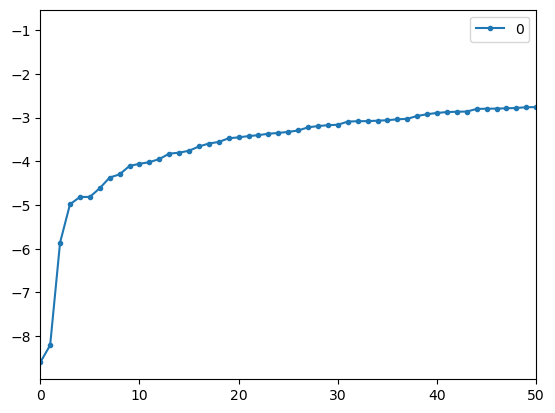

In [86]:
scores = pd.DataFrame(np.sort(df_score))
scores.plot(stacked = True, xlim=[0,50], style = ".-") #sayıyı artırırsam daha fazla gözlem sayısı eld eederim 50 yapıyorum şimdi 20den
plt.show

buradaki her bir nokta eşik değerler itemsil ediyor ve bu eşik değerlere göre grafik oluşturuldu. şimdi buradaki eşik değer ne olmalı problemim var. eşik değere grafiği incelediğimde bakıyorum ki en sert değişiklik yani son büyük sert değişiklik 2.5, -5 koordinatlarında yaşanmış bu yüzden bu noktayı eşik değer olarak alabilirim. dirsek yöntemini kullanarak buna karar verdim.

grafikte satırdakiler gözlemler ve sütundaki de skorlar(outlier skorları). bu skorlar ne kadar -1'e uzaksa o kadar kötüdür.

In [88]:
th = np.sort(df_score)[3] # sıraladıktan sonraki 4. indexxteki değeri alıyorum
th

-4.984151747711709

lof yöntemi ile tüm gözlem birimleri için aykırı değerlerimi belirledim ve eşik değerimi belirledim. eşik değerim -4.98

In [91]:
df[df_score < th], df[df_score < th].shape #3 gözlem olduğunu görüyorum.
# normalde sadece carat ve depth değerlerinde binlerce gözlem vardı. ancak çok 
# değişkenli gözleme baktığımda 3 tane kaldı, peki bunlar neden aykırı bunu anlamaya çalışıyorum.

(       carat  depth  table  price     x      y      z
 41918  1.030 78.200 54.000   1262 5.720  5.590  4.420
 48410  0.510 61.800 54.700   1970 5.120  5.150 31.800
 49189  0.510 61.800 55.000   2075 5.150 31.800  5.120,
 (3, 7))

In [92]:
df.describe([0.01, 0.05, 0.75, 0.90, 0.99]).T

,count,mean,std,min,1%,5%,50%,75%,90%,99%,max
carat,53940.000,0.798,0.474,0.200,0.240,0.300,0.700,1.040,1.510,2.180,5.010
depth,53940.000,61.749,1.433,43.000,57.900,59.300,61.800,62.500,63.300,65.600,79.000
table,53940.000,57.457,2.234,43.000,53.000,54.000,57.000,59.000,60.000,64.000,95.000
price,53940.000,3932.800,3989.440,326.000,429.000,544.000,2401.000,5324.250,9821.000,17378.220,18823.000
x,53940.000,5.731,1.122,0.000,4.020,4.290,5.700,6.540,7.310,8.360,10.740
y,53940.000,5.735,1.142,0.000,4.040,4.300,5.710,6.540,7.300,8.340,58.900
z,53940.000,3.539,0.706,0.000,2.480,2.650,3.530,4.040,4.520,5.150,31.800


#### şimdi değişkenlerim ile describe tablomda değişkenlerimi inceleyeceğim. teker teker. örneğin carat değişkenime bakıyorum. caratın ortalaması 0.798, max değeri 5.010. depthe bakıyorum depthin max değeri 79 outier skoru 78.2 (peki neden 79 gelmedi 78.2 maximuma yakın olduğu iiçn gelmiş olabilir diyorum.) depthin 78 olduğu satırda 78 dışında diğerleri o kadar anormal durmuyor o satırın depth yüzünden yakalanmış oalbileceğini düşünüyorum. peki neden 79 gelmedi de 78 geldi. çünkü diğer değişkeni ona uygun olmuş olabilir 79da ve bu sayede radara takılmamış olabilir. yani bir şekilde çok değişkenli etkinin sebep olmuş olabileceğini düüşnüyorum. 2. satırdaysa z radara yakalanmış. eninde sonunda çok değişkenli etki ile bu satırlar yakalandı ve şimdi üzerlerinde işlem yapacağım.

In [95]:
#önce indexlerini yakalıyorum.
df[df_score < th].index # 3 index gelecek zaten bunları silebilirim istersem

Index([41918, 48410, 49189], dtype='int64')

In [96]:
df[df_score < th].drop(axis = 0, labels = df[df_score < th].index) #axisi 0 yapıyorum ve labelı getirdiğim indexlerden yapıyorum ve drop ediyorum

,carat,depth,table,price,x,y,z


az olduğu için silebilirim ancak baskılama yöntemini de kullanabilirim. ancak baskılamak istediğimde bir problem var, kime göre baskılayacağım? yani bir tane gözlem seçebiliriz rastgele ya da en ortalardan gözlem seçebilirim ve bu aykırıları değiştirebilirim. bu senaryo için sadece 3 tane gözlem olduğundan problem olmayacaktır. peki threhsolda göre yüzlerce aykırı değer çıksaydı ne olacaktı? artık hücre yerine gözlem birimleri ile ilgilendiğim için yüzlerce değeri baskılamak yerine gözlem birimini kaldırıp yerine başka bir gözlem birimi konmalıdır. ancak böyle yaparak da kendim veri eklemiş olacağım için elimle zorla veriyi bozmuş oluyorum. bu yüzden bu işlemleri yapmak veriye fazlaca zarar vereceği için bunları yapmamam gerekiyor. bu yüzden eğer ağaç yöntemlerini kullanıyorsam bu konularda işlem yapmamam gerekiyor. ya da en azından çok ucundan veriyi tıraşlayabilirim. outlierthresolds ve replacewiththresholds u kullanarak gözlemlere kendi içinde yaklaşacağım. o zamanda tek değişkenli ile çok değişkenli arasındaki farkı gözardı mı edeceğim. hayır, bizim normalde kullanmayı tercih ettiğimiz gibi değerleri 95 e 5 ya da 99 a 1 şekilde kullanırsak örneğin depthin 79u gidecek ve threshold değer olan 78.2 değeri gelecek.


yani burada outlier değer fazla olursa gözlem sayılarını baskılamak mantıklı olmayacaktır. gözlem sayısı az ise çok değişkenli şekilde bakılıp o değerler çıkarılmalı.

Tekrardan hatırlatmakta fayda var eğer ağaç yöntemi kullanıyorsak outlier değerlere hiç dokunmuyorum. illa dokunulacaksa da çok ucundan 99 1 95 5 şeklinde dokunulabilir.

eğer doğrusal yöntem kullanıyorsam da aykırı değer problemi ciddi bir problemdir. eğer az sayıdaysa doldurmak yerine silmek tercih edilebilir. doldurmak yerine de tek değişkenli şekilde baskılamak tercih edilebilir yine ucundan.